In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def parse_attention_log(file_path):
    dataframes = {
        0: {},
        1: {},
        2: {},
        3: {},
    }

    with open(file_path, 'r') as file:
        written_lines = 0
        head = None
        for line in file.readlines():
            if written_lines > 15000:
                break
            
            if 'Head' in line:
                head = int(line.split()[2])
                continue
            
            line = line.split()
            line = [float(x) for x in line]
            n = len(line)
            if n > 0:
                if n not in dataframes[head]:
                    dataframes[head][n] = pd.DataFrame(columns=[str(i) for i in range(n)])
                df = dataframes[head][n]

                df.loc[len(df)] = line
                written_lines += 1

    return dataframes

In [3]:
dataframes = parse_attention_log("attention_log.txt")

In [4]:
def compute_mean_total_variation_distance(df):
    _, n = df.shape
    values = []
    for _, row in df.iterrows():
        s = 0
        differences = []
        for element in row:
            differences.append(abs(element - (1/n)))
        values.append(max(differences))
    return np.mean(values), np.var(values)


In [5]:
tv_data = {
    0: {'mean': [], 'var': []},
    1: {'mean': [], 'var': []},
    2: {'mean': [], 'var': []},
    3: {'mean': [], 'var': []},
}

for head in [0, 1, 2, 3]:
    print(f"Head {head}")
    for n in range(1, 10):
        mean, var = compute_mean_total_variation_distance(dataframes[head][n])
        tv_data[head]['mean'].append(mean)
        tv_data[head]['var'].append(var)
        print(f"  {n}:  Mean={mean:.2f}  Var={var:.2f}")


Head 0
  1:  Mean=0.00  Var=0.00
  2:  Mean=0.12  Var=0.01
  3:  Mean=0.22  Var=0.02
  4:  Mean=0.29  Var=0.03
  5:  Mean=0.30  Var=0.03
  6:  Mean=0.29  Var=0.02
  7:  Mean=0.33  Var=0.01
  8:  Mean=0.31  Var=0.02
  9:  Mean=0.20  Var=0.01
Head 1
  1:  Mean=0.00  Var=0.00
  2:  Mean=0.08  Var=0.01
  3:  Mean=0.11  Var=0.01
  4:  Mean=0.13  Var=0.01
  5:  Mean=0.17  Var=0.02
  6:  Mean=0.14  Var=0.02
  7:  Mean=0.19  Var=0.02
  8:  Mean=0.19  Var=0.03
  9:  Mean=0.22  Var=0.03
Head 2
  1:  Mean=0.00  Var=0.00
  2:  Mean=0.19  Var=0.01
  3:  Mean=0.25  Var=0.02
  4:  Mean=0.26  Var=0.02
  5:  Mean=0.26  Var=0.01
  6:  Mean=0.31  Var=0.02
  7:  Mean=0.29  Var=0.01
  8:  Mean=0.26  Var=0.01
  9:  Mean=0.31  Var=0.02
Head 3
  1:  Mean=0.00  Var=0.00
  2:  Mean=0.19  Var=0.02
  3:  Mean=0.24  Var=0.01
  4:  Mean=0.34  Var=0.03
  5:  Mean=0.46  Var=0.06
  6:  Mean=0.32  Var=0.04
  7:  Mean=0.43  Var=0.09
  8:  Mean=0.36  Var=0.08
  9:  Mean=0.42  Var=0.06


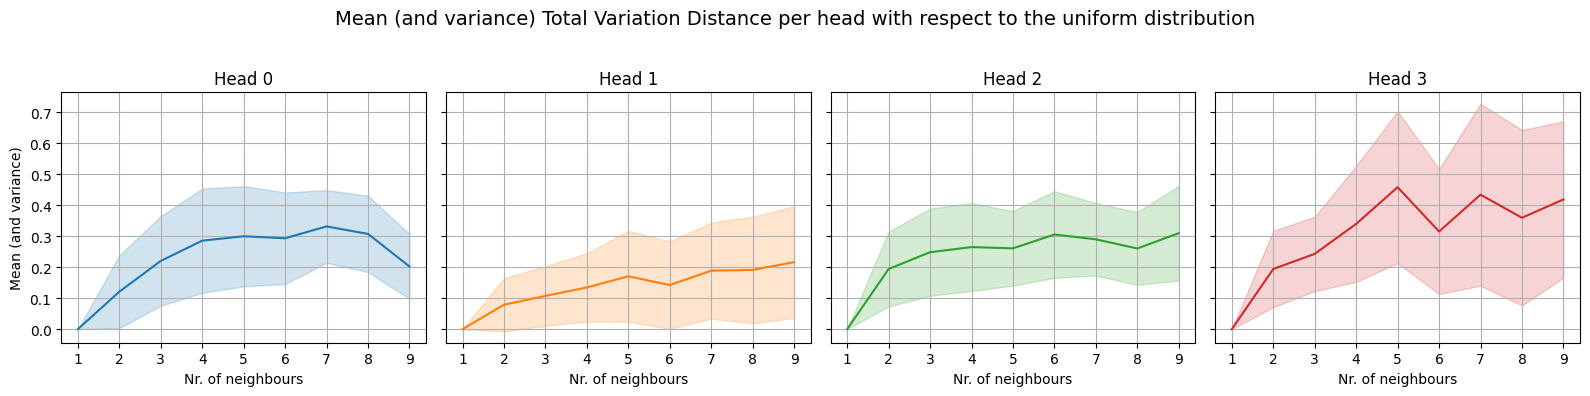

In [6]:
def plot_total_variances(tv_data):
    x = np.arange(1, 10)  # steps 1 to 9
    num_heads = len(tv_data)

    fig, axs = plt.subplots(1, num_heads, figsize=(16, 4), sharey=True)

    for head_id, (head, data) in enumerate(tv_data.items()):
        mean = np.array(data["mean"])
        var = np.array(data["var"])
        std = np.sqrt(var)

        ax = axs[head_id]
        ax.plot(x, mean, label=f"Head {head}", color=f"C{head}")
        ax.set_xticks(x)
        ax.fill_between(x, mean - std, mean + std, color=f"C{head}", alpha=0.2)
        ax.set_title(f"Head {head}")
        ax.set_xlabel("Nr. of neighbours")
        ax.grid(True)
        if head_id == 0:
            ax.set_ylabel("Mean (and variance)")

    plt.suptitle("Mean (and variance) Total Variation Distance per head with respect to the uniform distribution", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_total_variances(tv_data)